# The $\bar \kappa$ Threshold

$\bar \kappa$ is the threshold minimum renegotiation cost that is required to sustain a first best efficient smoothing contract.  Any $\kappa < \bar \kappa$ will require some endogenous distortion of the contract to keep the contract renegotiation-proof.

If a contract $(c_1^0,c_2^0)$ is renegotiated it would be to a new contract $(c_1, c_2)$ that maximizes one-self's preferences. Hence, a renegotiation-proof contract would satisfy the constraint:

$$
u(c_{1}^{0})+\beta u(c_{2}^{0}) \ge 
u(c_1) + \beta u(c_2) 
$$

Let's substitute on the right hand side for the best $c_1, c_2$ contract that one-self can obtain.  One-self wants

$$
u'(c_1) = \beta u'(c_2)
$$

For the CRRA case, this implies $c_2 = \beta^{\frac{1}{\rho}} \cdot c_1$.   The most favorable renegotiated contract for one-self would leave the renegotiating bank indifferent (after subtracting out the renegotiation cost):

$$
c_1 + c_2 = c_1^0 + c_2^0 - \kappa
$$

Since we just pointed out that $c_2 = \beta^{\frac{1}{\rho}} \cdot c_1$, this can be rewitten as:

$$
c_1 = \frac{c_1^0 + c_2^0 - \kappa}{1 + \beta^\frac{1}{\rho}}
$$

Notice also that $\beta u(c_2) = \beta u(\beta^{\frac{1}{\rho}} \cdot c_1)$ can be written  $\beta u(c_2)=\beta^{\frac{1}{\rho}}u(c_1)$ Putting this all together, the no-renegotiation constraint above can be rewritten as:


$$
u(c_{1}^{0})+\beta u(c_{2}^{0})\le u\left(\frac{c_{1}^{0}+c_{2}^{0}-\kappa}{1+\beta^{\frac{1}{\rho}}}\right)(1+\beta^{\frac{1}{\rho}})
$$

A first-best efficient contract $will be:  C_0^F=(c_0^F, c_1^F, c_2^F)$ with $c_1^F=c_2^F$. 

Let's substitute that into the no-renegotiation constraint above. With appropriate simplifications such as $c_1^F=c_2^F$ we can write:

$$
u(c_1^F)(1+\beta) \le u\left(\frac{2 \cdot c_1^F-\kappa}{1+\beta^{\frac{1}{\rho}}}\right)(1+\beta^{\frac{1}{\rho}})
$$

For this CRRA case, we can solve further:

$$
c_1^F \cdot \left ( 1+\beta^\frac{1}{\rho} \right)^\frac{1}{1-\rho}   \le \frac{2 \cdot c_1^F-\kappa}{1+\beta^{\frac{1}{\rho}}} \cdot \left ( 1+\beta \right)^\frac{1}{1-\rho}
$$

Re-arranging to solve for the $\kappa=\bar \kappa$ at which this holds as an equality, we find:

Setting $c_{1}^{0} =c_1^F = c_{2}^{0}$ equal to the implied efficient continuation contract into no-renegotiation constraint we can solve for the $\bar \kappa$ value of $\kappa$ that allows this to just hold:

$$
\bar \kappa = c_1^F \cdot  \Upsilon
$$

where 

$$
\Upsilon=\left[2-\left[\frac{(1+\beta)}{\left(1+\beta^{\frac{1}{\rho}}\right)^{\rho}}\right]^{\frac{1}{1-\rho}}\right]
$$

The above is for the competitive case.  

For the monopoly case we simply replace the competitive $c_1^F$ term by the analogous $c_1^{mF}$ efficient monopoly contract ters. The monopoly formula for the threshold is thus $\bar \kappa^m = c_1^{mF} \cdot  \Upsilon$

This diagram helps to visualize.  Zero's first-best commitment smoothing contract at $F$ is not because the $\kappa =\bar \kappa$ renegotiation cost is just high enough to make the bank reject the most favorable renegotiated contract that could be offered to the bank at $R$ .

<img src="media/kbarfig.png" width="500"/>
</div>

## Code
Several functions used can be found in the python module [Contract.py](Contract.py)

In [1]:
import Contract

Code below uses this module to produce Figure 1.  If code is hidden in HTML view, click button to display.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact,fixed
plt.rcParams['figure.figsize'] = 10, 8
np.set_printoptions(precision=2) 

## Competitive $\bar \kappa$ and Monopoly $\bar \kappa^M$

We will in general have  $\bar \kappa^M \le \bar \kappa$ 

In [3]:
Cc = Contract.Competitive(beta=0.6)
Cm = Contract.Monopoly(beta=0.6)

In [4]:
Cc.kbar(), Cm.kbar()

(4.43642366042653, 4.3219284107549765)

In [5]:
def plotkb(rho=0.9, y0 = 100):
    num = 40
    kb = np.zeros(shape=(num, 3))
    Cc.y = np.array([y0, (300-y0)/2, (300-y0)/2])
    Cm.y = np.array([y0, (300-y0)/2, (300-y0)/2])
    Cc.rho = rho
    Cm.rho = rho
    for i in range(num):
        Cc.beta = i/num
        Cm.beta = i/num
        kb[i] = np.array([i/num, Cc.kbar(), Cm.kbar()])
    
    plt.plot(kb[:,0], kb[:,1], label = 'competitive')
    plt.plot(kb[:,0], kb[:,2], label = 'monopoly')
    plt.legend()
    plt.xlabel(r'$\beta$', fontsize=14)
    plt.ylabel(r'$\bar \kappa, \bar \kappa^m$', fontsize=14)
    plt.xlim(0,1)
    plt.ylim(0,20)
    

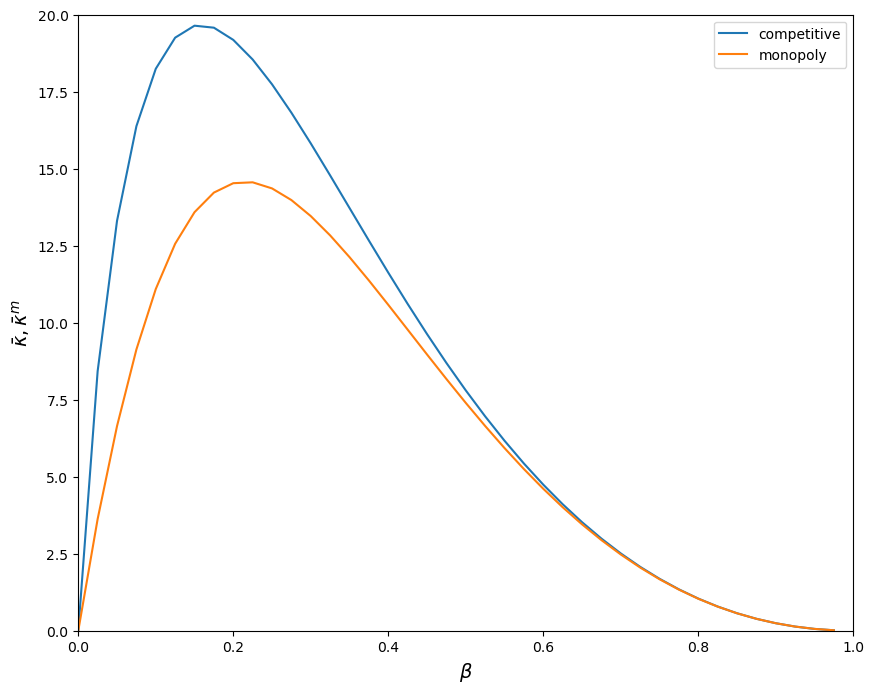

In [6]:
plotkb(rho = 1.1, y0 = 100)

## Interactive Plot

In order for the widget sliders to affect the chart you must be running this on a jupyter notebooks server.  If you are viewing this on the web, click on the Rocket icon button above to launch a cloud server service (Binder, or google colab).

In [8]:
interact(plotkb, rho=(0.1, 2, 0.101), y0=(50,300,10));

interactive(children=(FloatSlider(value=0.9, description='rho', max=2.0, min=0.1, step=0.101), IntSlider(value…